In [9]:
# Hierarchies of stocks

# Displaying a Dendrogram, and extracting the cluster labels

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load df
stock_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/company-stock-movements-2010-2015-incl.csv')

# Create array for model
stock_arr = stock_df.iloc[:,1:].values

# Create a list of the company names
company_names = stock_df.iloc[:,0].values.tolist()

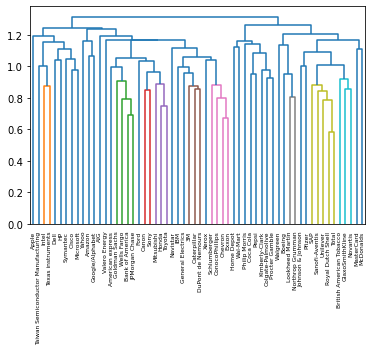

In [10]:
# Normalizing the data
norm_stock_arr = normalize(stock_arr)

# Establishing linkage
# In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. 
# In single linkage, the distance between clusters is the distance between the closest points of the clusters.
mergings = linkage(norm_stock_arr, method='complete')

# Creating dendrogram
dendrogram(mergings, labels= company_names, leaf_font_size=6, leaf_rotation=90)

# Displaying
plt.show()

In [15]:
# Extracting the cluster labels


# Use fcluster to extract labels
# mergings, height, criterion
labels = fcluster(mergings, 1.2, criterion= 'distance')

# Create a DataFrame with labels and names as columns for storage
pred_df = pd.DataFrame(
    {
    'Labels': labels,
    'Company Names': company_names
    }
)

# Create a crosstab
ct = pd.crosstab(pred_df['Labels'], pred_df['Company Names'])

# Display Crosstab
print(ct)

Company Names  3M  AIG  Amazon  American express  Apple  Bank of America  \
Labels                                                                     
1               0    0       0                 0      1                0   
2               0    0       1                 0      0                0   
3               1    1       0                 1      0                1   
4               0    0       0                 0      0                0   
5               0    0       0                 0      0                0   
6               0    0       0                 0      0                0   

Company Names  Boeing  British American Tobacco  Canon  Caterpillar  ...  \
Labels                                                               ...   
1                   0                         0      0            0  ...   
2                   0                         0      0            0  ...   
3                   0                         0      1            1  ...   
4          